In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
# from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
import numpy as np
import math as m
import vice
import sys
import os
sys.path.append("..")
from src.utils import mu, get_velocity_profile, boxcarsmoothtrend, oh_to_12pluslog
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=0, releaselevel='final', serial=0)


In [2]:
reference = vice.output("../outputs/constant/vgas-0")

In [42]:
outputs = [
    # "../outputs/constant/vgas-0p5",
    # "../outputs/constant/vgas-1",
    # "../outputs/constant/vgas-1p5"
    # "../outputs/potential_well_deepening/gamma0p1",
    # "../outputs/potential_well_deepening/gamma0p2",
    # "../outputs/potential_well_deepening/gamma0p3"
    "../outputs/amd/betaphiin0p8",
    "../outputs/amd/betaphiin0p7",
    "../outputs/amd/betaphiin0p6"
]
outputs = [vice.output(name) for name in outputs]

/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_93941/3426246605.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


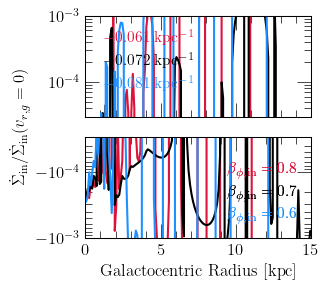

In [43]:
# LOGFACTOR = 3
COLORS = ["crimson", "black", "dodgerblue"]
# LABELS = [r"$v_{r,g} = %.1f$ km/s" % (v) for v in [-0.5, -1, -1.5]]
# GRAD = [-0.052, -0.063, -0.069]
# LABELS = [r"$\gamma = 0.1$", r"$\gamma = 0.2$", r"$\gamma = 0.3$"]
# GRAD = [-0.050, -0.058, -0.065]
LABELS = [r"$\beta_{\phi,\text{in}} = %g$" % (b) for b in [0.8, 0.7, 0.6]]
GRAD = [-0.061, -0.072, -0.081]

fig = plt.figure(figsize = (3, 3))
# ax = fig.add_subplot(111)
# ax.set_xlabel(r"Galactocentric Radius [kpc]")
# ax.set_ylabel(r"$\dot \Sigma_\text{in} / \dot \Sigma_\text{in}(v_{r,g} = 0)$ [$\times$ 10$^{-%d}$]" % (LOGFACTOR))
# ax.set_xlim([0, 15])
# ax.set_ylim([-3, 3])
# ax.set_yticks([-2, 0, 2])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
for ax in [ax1, ax2]: ax.set_yscale("log")
    # ax.yaxis.set_major_formatter(fsf("%g"))
# ax1.set_yscale("log")
# ax2.set_yscale("log")
plt.setp(ax1.get_xticklabels(), visible = False)
ax2.set_xlabel(r"Galactocentric Radius [kpc]")
dummy = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticks = [], yticks = [], zorder = -1000)
dummy.spines["left"].set_visible(False)
dummy.spines["right"].set_visible(False)
dummy.set_ylabel(r"$\dot \Sigma_\text{in} / \dot \Sigma_\text{in}(v_{r,g} = 0)$", labelpad = 40)
ax1.set_xlim([0, 15])
# ax1.set_ylim([3.e-5, 3.e-2]) # Constant
# ax2.set_ylim([3.e-4, 3.e-1])
ax1.set_ylim([3.e-5, 1.e-3]) # PWD
ax2.set_ylim([3.e-5, 1.e-3])

def ifr_snapshot(output, lookback, zone_width = 0.1):
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    n_zones = len(output.zones.keys())
    radii = [zone_width * (i + 0.5) for i in range(n_zones)]
    ifr = [output.zones["zone%d" % (i)].history["ifr"][idx] for i in range(n_zones)]
    return [radii, ifr]

def plot_diff(ax_pos, ax_neg, output, reference, lookback, zone_width = 0.1, **kwargs):
    # print('a')
    radii, ifr = ifr_snapshot(output, lookback, zone_width = zone_width)
    # print('b')
    _, ref_ifr = ifr_snapshot(reference, lookback, zone_width = zone_width)
    # print('c')
    yvals = [a / b - 1 if b else float("inf") for a, b in zip(ifr, ref_ifr)]
    # yvals = [10**LOGFACTOR * y for y in yvals]
    # print(yvals)
    ax_pos.plot(radii, yvals, **kwargs)
    if kwargs["label"] is not None: kwargs["label"] = None
    ax_neg.plot(radii, [-y for y in yvals], **kwargs)

lines = []
for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "label": LABELS[i]
        # "label": r"$\nabla = %.3f$ kpc$^{-1}$" % (GRAD[i])
    }
    lines.append(
        ax2.plot([1, 2], [1, 2], **kwargs)[0]
    )
kwargs = {
    "loc": mpl_loc("lower right"),
    "handlelength": 0,
    "fontsize": 11
}
leg = ax2.legend(**kwargs)
fancy_legend(leg, COLORS)
ax2.add_artist(leg)
for line in lines: line.remove()

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        # "label": LABELS[i]
        "label": r"$%.3f$ kpc$^{-1}$" % (GRAD[i])
        # "label": r"%s; $\nabla = %.3f$ kpc$^{-1}$" % (LABELS[i], GRAD[i])
    }
    plot_diff(ax1, ax2, outputs[i], reference, 0, **kwargs)

# ax.axhline(0, c = named_colors()["black"], linestyle = ":")

kwargs = {
    "loc": mpl_loc("upper left"),
    "handlelength": 0,
    "fontsize": 11
}
leg = ax1.legend(**kwargs)
fancy_legend(leg, COLORS)

plt.tight_layout()
negative_log(ax2)
dummy.set_position([
    ax1.get_position().x0,
    ax2.get_position().y0,
    ax1.get_position().x1 - ax1.get_position().x0,
    ax1.get_position().y1 - ax2.get_position().y0
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    # plt.savefig("./sfr-ifr/ifrshift-constant.%s" % (ext), **kwargs)
    # plt.savefig("./sfr-ifr/ifrshift-pwd.%s" % (ext), **kwargs)
    plt.savefig("./sfr-ifr/ifrshift-amd.%s" % (ext), **kwargs)
plt.show()

In [ ]:
outputs = [
    "../outputs/constant/vgas-0",
    "../outputs/

/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_46541/1937142896.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


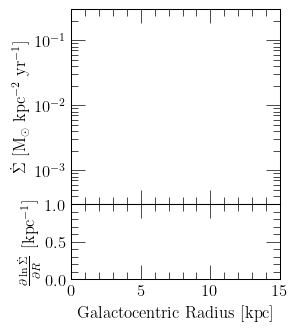

In [35]:
COLORS = 

fig = plt.figure(figsize = (3, 3))
ax = fig.add_subplot(111)
res = fig.add_axes([0.1, 0.1, 0.8, 0.1], sharex = ax)
plt.setp(ax.get_xticklabels(), visible = False)
res.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"$\dot \Sigma$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]")
res.set_ylabel(r"$\frac{\partial \ln \dot \Sigma}{\partial R}$ [kpc$^{-1}$]")
ax.set_yscale("log")
ax.set_xlim([0, 15])
ax.set_ylim([3.e-4, 0.3])

def plot_profile

reswidth = 0.25
plt.tight_layout()
res.set_position([
    ax.get_position().x0,
    ax.get_position().y0,
    ax.get_position().x1 - ax.get_position().x0,
    reswidth
])
ax.set_position([
    ax.get_position().x0,
    ax.get_position().y0 + reswidth,
    ax.get_position().x1 - ax.get_position().x0,
    ax.get_position().y1 - ax.get_position().y0 - reswidth
])
plt.show()